# Ecuaciones diferenciales ordinarias


Como es sabido en la historia de la computación, uno de los problemas que motivo más fuertemente la construcción de computadoras digitales programables fue la de solucionar las ecuaciones diferenciales ordinarias que describen la trayectoria de misiles balísticos (esto claro, durante la segunda guerra mundial).  


Dichas ecuaciones, asi como muchas otras ecuaciiones diferenciales ordinarias, son imposibles de resolver analíticamente, por lo que la única manera de resolverlas es acudir a métodos numéricos que nos permitan obtener una solución aproximada al problema.  

Existen libros enteros y cursos también, dedicados al estudio de la solución numérica de ecuaciones diferenciales tanto ordinarias como parciales.

## Preludio Computacional 1: prealocación de memoria de arreglos

Durante el curso, hemos en muchas ocasiones, construido arreglos que representan a los elementos de una sucesión, **iniciando con un arreglo que contiene un elemento  añadiendole elementos uno a uno**. Esto se puede ya que, como ya mencionamos anteriormente, los arreglos en Python son **dinámicos** .  


En general, es mala idea tratar con arreglos dinámicos pues es computacionalmente costoso ir asignado o alocando memoria a elementos nuevos. Lo más conveniente, de ser posible, es construir un arreglo de la longitud que necesitemos desde un incio. Así podemos tratar al arreglo de manera estática, solo cambiamos sus elementos a nuestro gusto pero no cambiamos su longitud.

En Python tenemos este tipo de arreglos:

- La función `zeros(n)` crea un arreglo 1D de longitud $n$ en la que cada elemento es un $0$
- La función `ones(n)` crea un arreglo 1D de longitud $n$ en la que cada elemento es un $1$

In [2]:
import numpy as np 
from sys import getsizeof
from timeit import default_timer
from time import time

x = []
y = np.array([], dtype = np.float32)
z = np.zeros(10, dtype = np.float32)

print("Tamaño en bytes de arreglo dinámico: ", getsizeof(x))
print("Tamaño en bytes de arreglo numpy dinámico: ", getsizeof(y))
print("Tamaño en bytes de arreglo numpy estático: ", getsizeof(z))

Tamaño en bytes de arreglo dinámico:  56
Tamaño en bytes de arreglo numpy dinámico:  96
Tamaño en bytes de arreglo numpy estático:  136


Podemos usar la prealocación a la hora de construir sucesiones recursivas como las que usamos en la mayoria de métodos numéricos. 

In [11]:
def fibonacci(n):
    
    final = np.zeros(n, dtype = np.int64)
    final[0], final[1] = 1, 1
    
    for i in range(2, n):
        
        final[i] = final[i -1] + final[i-2]
        
    return final

print(fibonacci(10))

[ 1  1  2  3  5  8 13 21 34 55]


## Preludio Computacional 2: tuplas

Hasta ahora, hemos trabajado con objetos iterables como listas, arreglos y rangos, los cuales se pueden describir a grandes rasgos como sucesiones ordenadas de objetos. Sabemos que, en caso de las listas y los arreglos podemos cambiar sus elementos

In [117]:
nombres = ["Luis", "José", "Ana"]
nombres[1] = "Eduardo"
print(nombres)

['Luis', 'Eduardo', 'Ana']


Podemos cambiar sus entradas por que las listas y los arreglos son **objetos mutables**, es decir, que pueden cambiar sus elementos. Existen objetos **no mutables** que también representan sucesiones de objetos pero que no podemos cambiar sus elementos. Dichos objetos son **tuplas** (de tipo `Tuple` en Python). Una tupla se define con la siguiente sintaxis

``tup1 = (objt1, objt2)``

In [119]:
tupNombres = ("Luis", "José", "Ana")
print(tupNombres)
print(type(tupNombres))

('Luis', 'José', 'Ana')
<class 'tuple'>


In [120]:
# Si intentamos cambiar un elemento tendremos un error

tupNombres[0] = "Eduardo"

TypeError: 'tuple' object does not support item assignment

La función `len()` funciona de igual manera 

In [121]:
print(len(tupNombres))

3


## Preludio computacional 3: productos cartesianos

En las siguientes clases trabajaremos con objetos como campos vectoriales y otros análogos, los cuales viven en espacios de varias dimensiones.


Muchas veces nos va a interesar poder obtener el producto cartesiano de dos arreglos, es decir, un objeto de la forma

$$\{ (x,y) \; | \; x \in xs, \; \; y \in ys  \}$$


Podemos utilizar compresión de arreglos en Python para crear ese arreglo con la siguiente sintaxis

```python
prodCart = [[x,y] for x in xs for y in ys]
```

In [127]:
#Ejemplo simple
xs = [1,2,3]
ys = [8,9]

prodCart = [[x,y] for x in xs for y in ys]

print(prodCart)

[[1, 8], [1, 9], [2, 8], [2, 9], [3, 8], [3, 9]]


Además podemos hacer esto mismo con tuplas:

In [8]:
#Ejemplo simple
xs = [1,2,3]
ys = [8,9]

prodCart = [(x,y) for x in xs for y in ys]

print(prodCart)

[(1, 8), (1, 9), (2, 8), (2, 9), (3, 8), (3, 9)]


## Preludio matemático: Ecuaciones diferenciales

Sea $x(t): I \subseteq \mathbb{R}  \rightarrow \mathbb{R} $ una función de clase $C^{1}$, es decir, una función derivable en todo $I$ con derivada continua en $I$. Una ecuación diferencial de primer orden es una ecuación **funcional** de la siguiente forma

$$ \frac{dx}{dt} = f(x(t), t)$$

Notemos que, a diferencia de una ecuación algebraica donde las variables representan números o miembros de algún otra estructura algebraica "simple" (vectores, matrices, etc) que solo operan con operadores algebraicos como suma, producto, etc, en una ecuación diferencial algunas variables representan **funciones**.


Más aun las operaciones que se les realizan a nuestros objetos no son operaciones algebraicas simples si no operaciones más delicadas, una derivada o la aplicación de una función arbitraria.

La técnica más estándar para resolver una ecuación diferencial consiste en utilizar el teorema fundamental del cálculo para integrar ambos lados de la ecuacipon respecto al tiempo. Sin embargo, a la hora de realizar dicha integración, es probable que surgan **constantes de integración**. Para poder determinar dichas constantes, será necesario tener una condición sobre la función $x$, es decir, conocer un punto en el que sepamos su valor.

$$x(t_i) = C$$

### Problemas de valores iniciales

Aunque el punto $t_i$ puede ser un punto arbitrario del dominio de la función, en general, lo que tenemos que es que ese tiempo es un tiempo que llamamos **inicial** y denotamos $t_0$ y la solución $x(t)$ nos interesa conocerla para tiempos $t> t_{0}$ Cuando ese es el caso decimos que tenemos un **problema de valores iniciales** descrito por las dos ecuaciones

$$ \left\{ \begin{array}{lcc}
             \frac{dx}{dt} = f(x(t),t) \\
             \\ x(t_0) = x_0 \\
             \end{array}
   \right.$$

### Campo de direcciones o "retrato fase" 

Antes de resolver una ecuación diferencial, podemos darnos una idea del comportamiento que tendrán las soluciones si graficamos el campo de direcciones o retrato fase de la curva: el campo vectorial de las pendientes de las funciones que son solución a la ecuación diferencial pero no necesariamente a la condición incial. Dicho campo corresponde al campo vectorial $P: \mathbb{R} ^{2} \rightarrow \mathbb{R} ^{2}$ definido por 

$$P(t,x) = (1, f(x,t))$$

En Python podemos graficar un campo vectorial utilizando la función `quiver` del paquete Matplotlib. La sintaxis es

```Python
quiver(xs,ys)
```

La función hace una gráfica consistente en flechas entre los puntos `(xs[i], ys[i])`

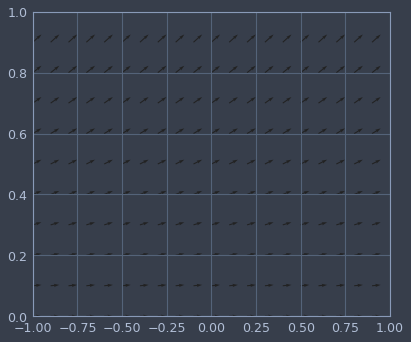

In [12]:
import matplotlib.pyplot as plt

from jupyterthemes import jtplot

jtplot.style()

x,y = np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1)
X,Y  = np.meshgrid(x, y)

U = np.ones((len(X), len(X)) )
V = Y

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)

plt.show()

## El método de Euler

El método más sencillo para resolver numéricamente un problema de valores inciales es el método de Euler, que consiste en aproximar la derivada $\dot{x}$ con una diferencia finita hacia adelante. Así, obtenemos

$$\frac{x(t +h) - x(t)}{h} = f(x,t)$$

Despejando encontramos que 

$$x(t + h) = x(t) + h \; f(x,t)$$

Es claro que, si conocemos $x(t_0) = x_{0}$ y $t_0$ esta regla nos permite calcular $x(t_0 + h)$ y también $t_{0} + h$, posteriormente podemos calcular $x(t_0 + 2h)$ y así sucesivamente para obtener $x(t_{0} + kh)$ para cualquier $k$. Planteandolo en términos de una sucesión recursiva, sea $t_{k} = t + kh$ entonces $x_k : = x(t_{k})$, entonces la sucesión recursiva del método de Euler es

$$ x_k = \left\{ \begin{array}{lcc}
             x_0 & k=0 \\
             \\ x_{k-1} + h f(x_{k-1},t_{k-1}) & k>0 \\
             \end{array}
   \right.$$


>Notemos que esto solo nos dará los valores de $x(t)$ en un montón de tiempos discretos $t_{k}, k \in \mathbb{N}$. Todos los métodos numéricos para EDO regresan la solución como un conjunto de puntos discretos. Si nosotros insitieramos en querer conocer, en lugar de puntos discretos, la función completa, podriamos utilizar interpolación para convertir los puntos discretos en una función

## Ejercicio 1

In [16]:
def f(x,t):
    
    return x

def Euler(t, tf, dt, x):
    
    tt = [t]
    xx = [x]
    
    while t <= tf:
        
        x = x + dt*f(x,t)
        t += dt
        xx.append(x)
        tt.append(t)
        
    return tt, xx    

Ahora utilizamos esta función para resolver las siguientes ecuaciones

$$\dot{x} = x$$

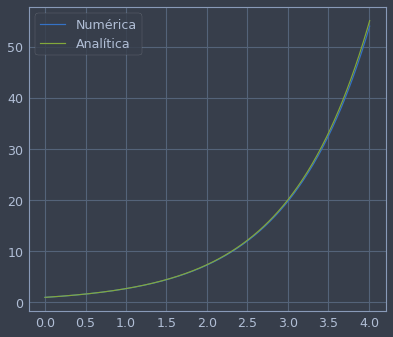

In [19]:
def Sol_Anali(t):

    return np.exp(t)

t, x1 = Euler(0,4,0.01, 1)

x2 = Sol_Anali(t)

plt.plot(t,x1, label= "Numérica")
plt.plot(t,x2, label = "Analítica")
plt.legend()
plt.show()

## Ecuaciones de orden mayor: reducción

En la practica del dia a dia, en particular en la física, por lo general tratamos con ecuaciones diferenciales de orden mayor a uno. En general, una ecuación diferencial de orden $k es una  